## Importing the Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt, font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pickle
import warnings

warnings.filterwarnings('ignore')

## Read the dataset

In [2]:
df = pd.read_csv('data.csv')

## Displaying the details of dataset

In [3]:
df.head(20)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,10,1,6,7,9,Responsible
1,Male,19,4,8,7,4,6,Extraveted
2,Female,18,3,5,7,7,7,Serious
3,Female,22,7,1,7,8,10,Responsible
4,Female,19,10,1,7,4,8,Dependable
5,Male,18,9,4,7,7,7,Dependable
6,Female,17,9,1,6,6,9,Responsible
7,Female,19,10,1,6,7,9,Responsible
8,Male,18,5,4,7,10,5,Serious
9,Female,19,7,1,7,4,10,Dependable


In [4]:
df.tail()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
1019,Female,19,9,3,9,5,9,Responsible
1020,Male,18,4,5,8,9,6,Serious
1021,Male,18,4,9,3,7,5,Extraveted
1022,Male,23,10,2,10,6,7,Responsible
1023,Female,18,8,3,6,7,9,Responsible


In [6]:
df.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,19.857422,5.615234,4.826172,7.000000,6.297852,7.309570
std,2.555577,2.759929,2.630942,1.940463,1.805324,1.493834
min,5.000000,1.000000,1.000000,3.000000,3.000000,5.000000
25%,18.000000,3.000000,3.000000,6.000000,5.000000,6.000000
50%,19.000000,6.000000,4.000000,7.000000,6.000000,7.000000
75%,21.000000,8.000000,7.000000,8.000000,8.000000,8.000000
max,28.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## EDA Process

In [7]:
df.dtypes

Gender               object
Age                   int64
openness              int64
neuroticism           int64
conscientiousness     int64
agreeableness         int64
extraversion          int64
Personality          object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             1024 non-null   object
 1   Age                1024 non-null   int64 
 2   openness           1024 non-null   int64 
 3   neuroticism        1024 non-null   int64 
 4   conscientiousness  1024 non-null   int64 
 5   agreeableness      1024 non-null   int64 
 6   extraversion       1024 non-null   int64 
 7   Personality        1024 non-null   object
dtypes: int64(6), object(2)
memory usage: 64.1+ KB


In [9]:
df.shape

(1024, 8)

In [10]:
df.isnull().sum()

Gender               0
Age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

In [11]:
# Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [53]:
df.head(10)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,1,17,10,1,6,7,9,3
1,1,19,4,8,7,4,6,1
2,0,18,3,5,7,7,7,4
3,0,22,7,1,7,8,10,3
4,0,19,10,1,7,4,8,0
5,1,18,9,4,7,7,7,0
6,0,17,9,1,6,6,9,3
7,0,19,10,1,6,7,9,3
8,1,18,5,4,7,10,5,4
9,0,19,7,1,7,4,10,0


In [13]:
df.skew()

Gender               0.093991
Age                  0.471614
openness            -0.122105
neuroticism          0.352922
conscientiousness   -0.250132
agreeableness       -0.061142
extraversion         0.102980
Personality          0.155147
dtype: float64

## Visuliations

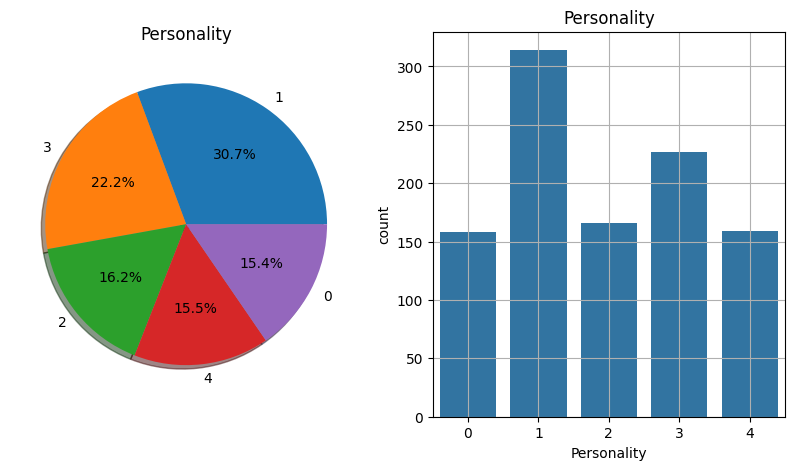

In [14]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

df['Personality'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    ax=ax[0],  
    shadow=True 
)
ax[0].set_title('Personality')

ax[0].set_ylabel('')

sns.countplot(x='Personality', data=df, ax=ax[1])

ax[1].set_title('Personality')

plt.grid()

plt.show()

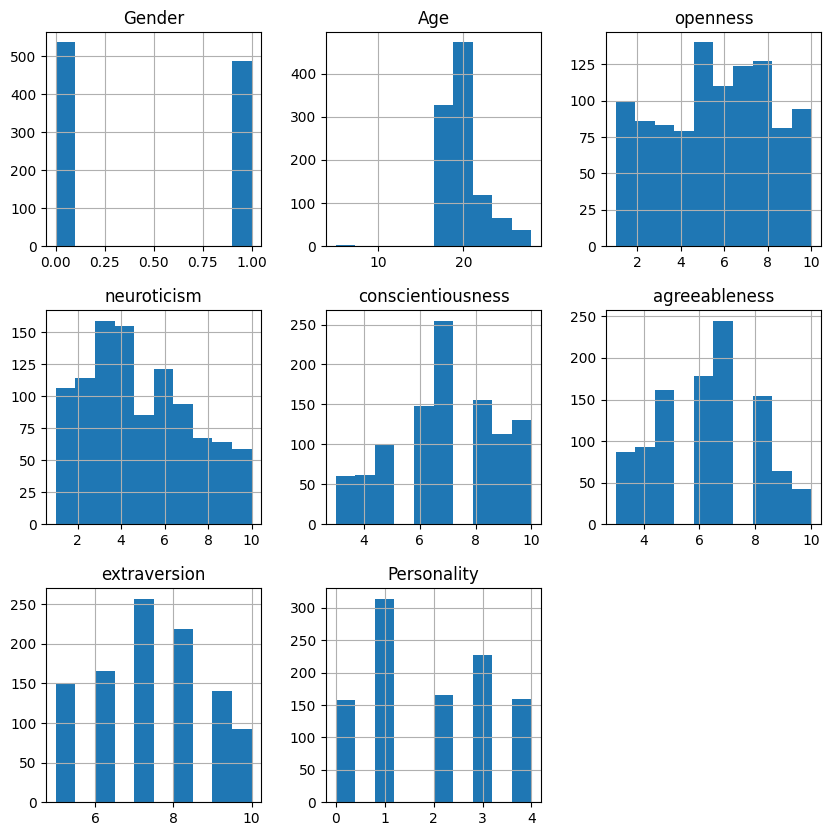

In [15]:
df.hist(bins=10, figsize=(10, 10))

plt.show()

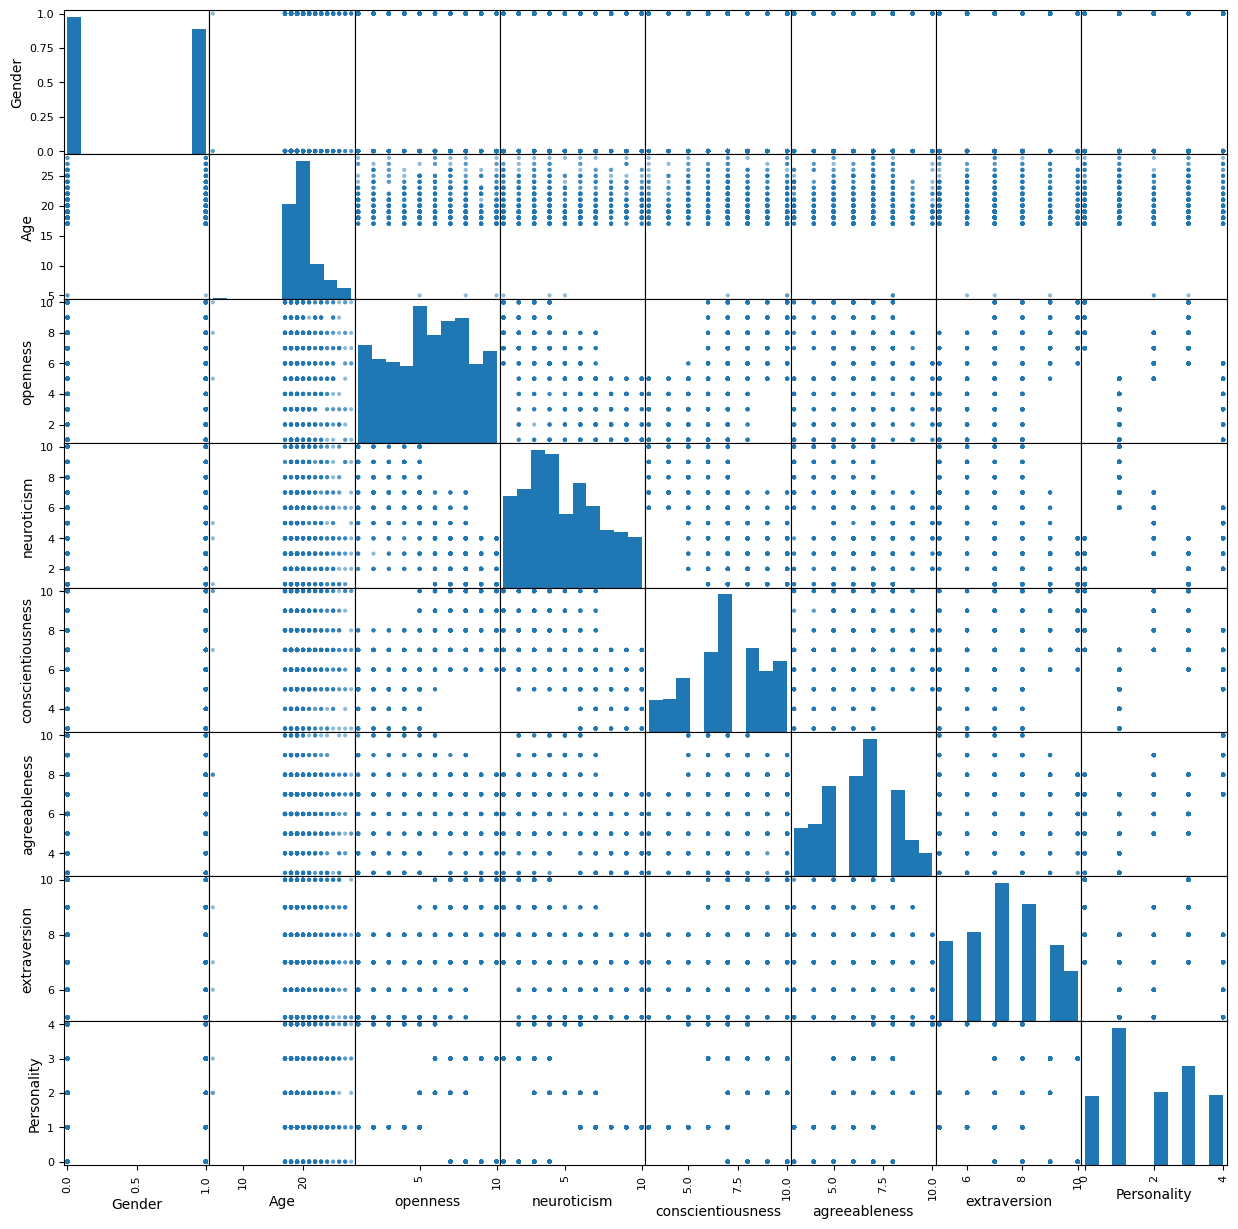

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(15, 15));

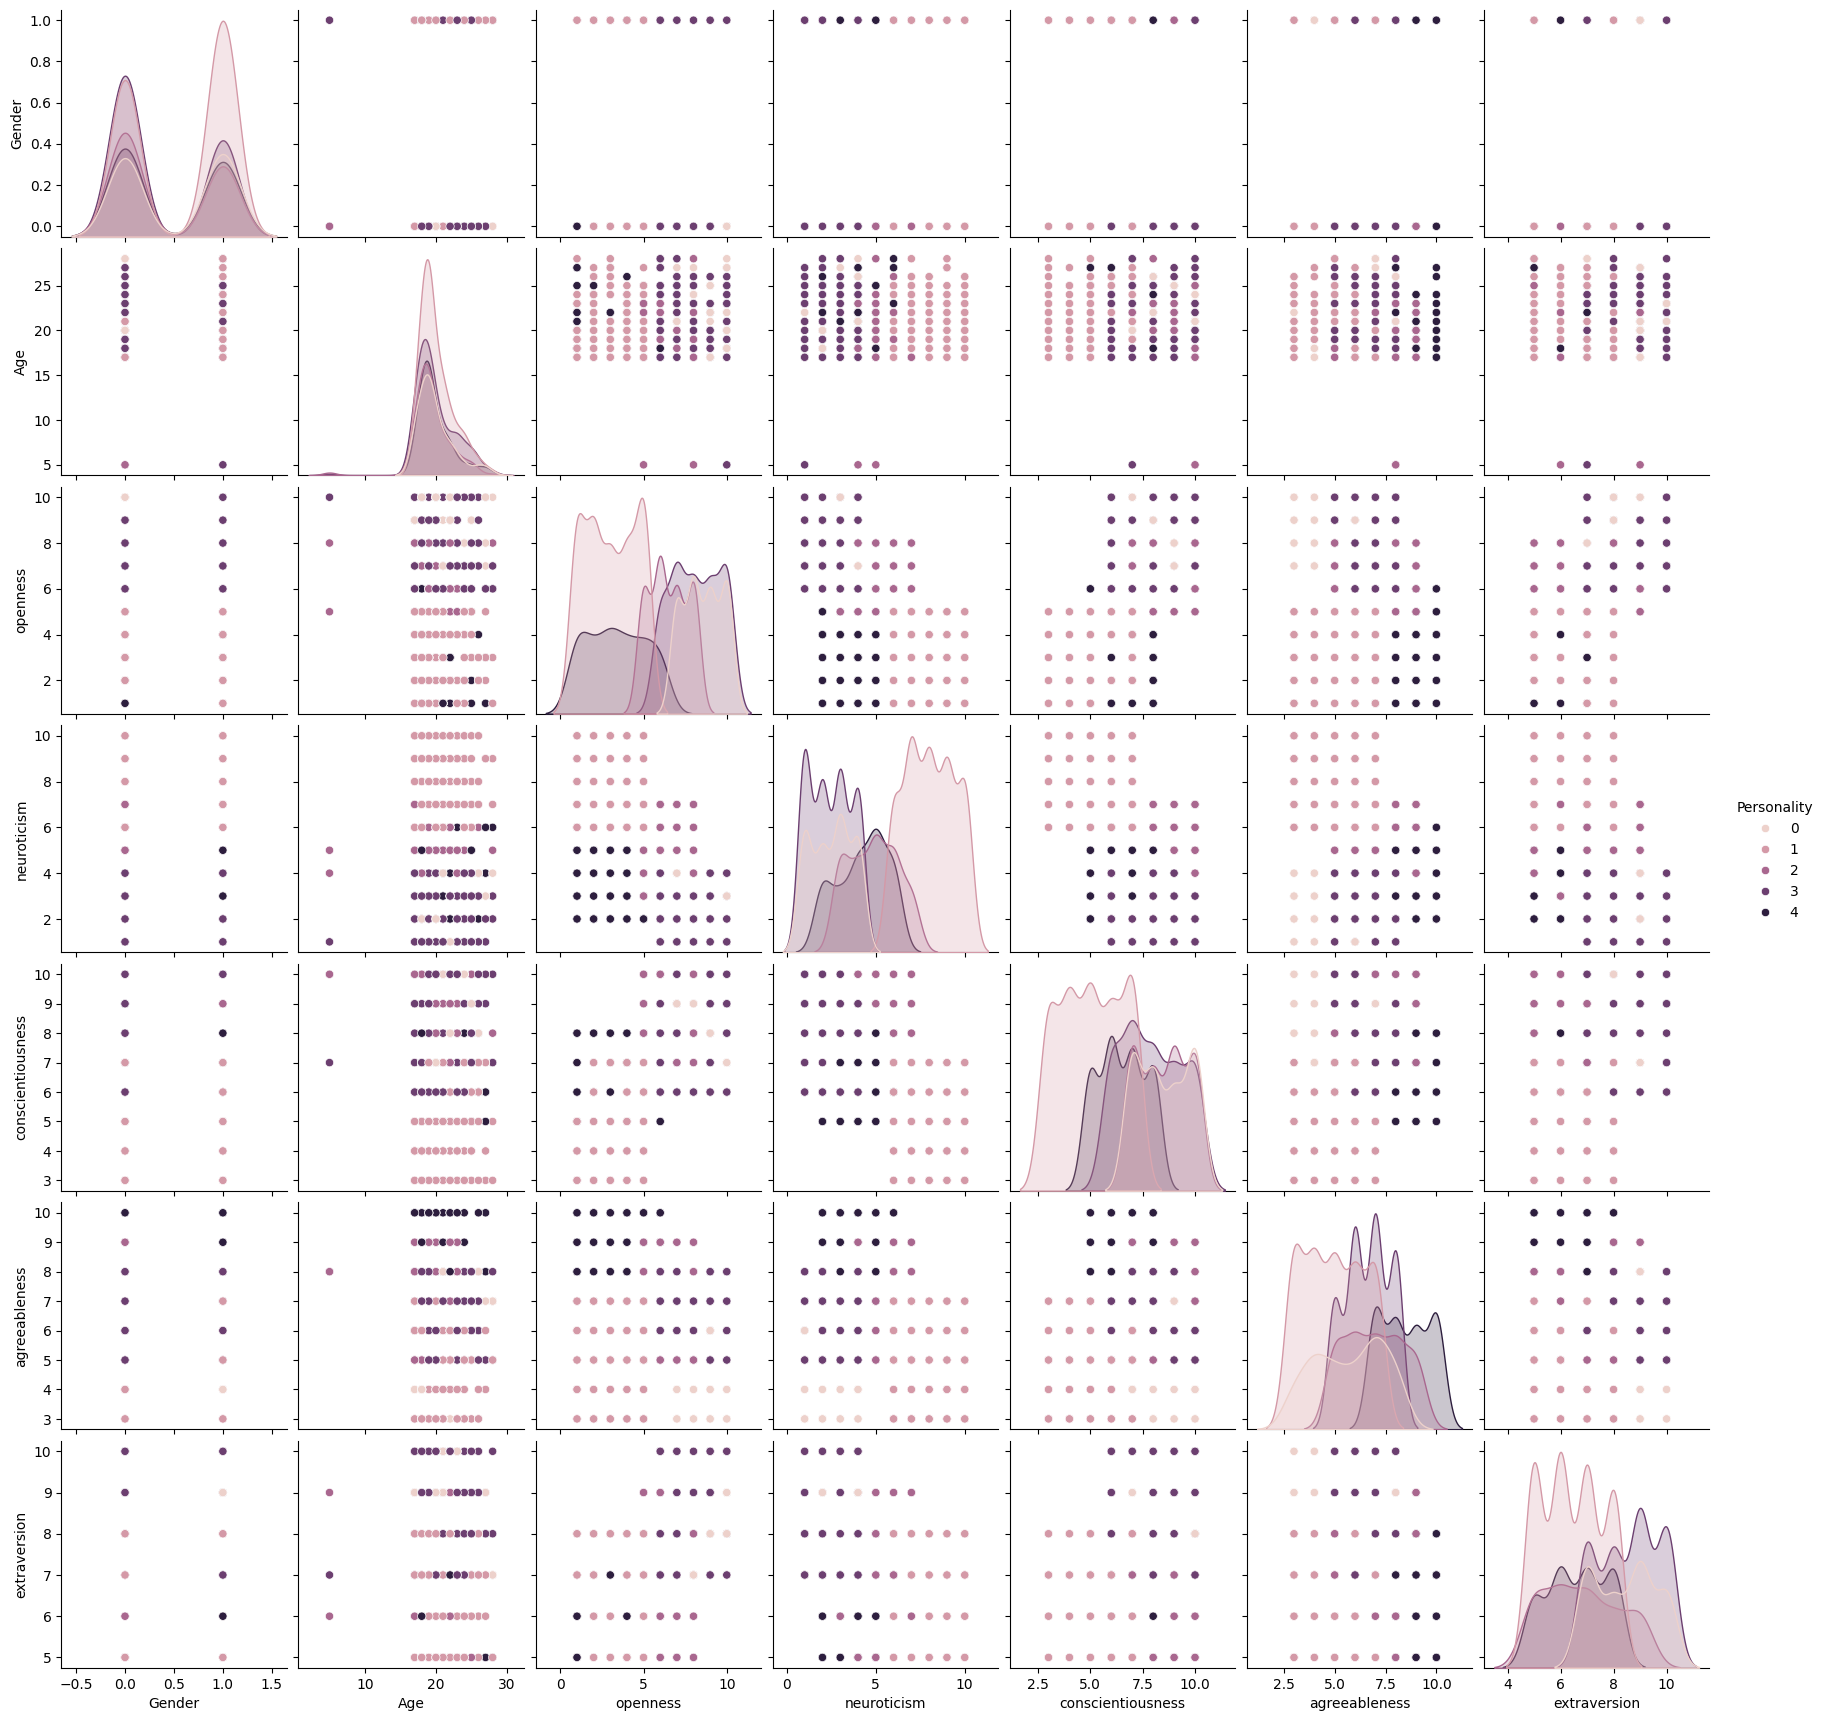

In [17]:
sns.pairplot(data=df, hue='Personality')

plt.show()

In [18]:
df.corr() 

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
Gender,1.000000,0.111436,-0.110738,0.112148,-0.098796,-0.109823,-0.077355,-0.106851
Age,0.111436,1.000000,-0.040077,0.026696,-0.040015,-0.032738,0.016950,-0.011274
openness,-0.110738,-0.040077,1.000000,-0.650020,0.590649,0.067362,0.503822,-0.069573
neuroticism,0.112148,0.026696,-0.650020,1.000000,-0.552783,-0.329698,-0.463340,-0.282127
conscientiousness,-0.098796,-0.040015,0.590649,-0.552783,1.000000,0.198117,0.302826,0.069460
agreeableness,-0.109823,-0.032738,0.067362,-0.329698,0.198117,1.000000,0.021959,0.562323
extraversion,-0.077355,0.016950,0.503822,-0.463340,0.302826,0.021959,1.000000,-0.008720
Personality,-0.106851,-0.011274,-0.069573,-0.282127,0.069460,0.562323,-0.008720,1.000000


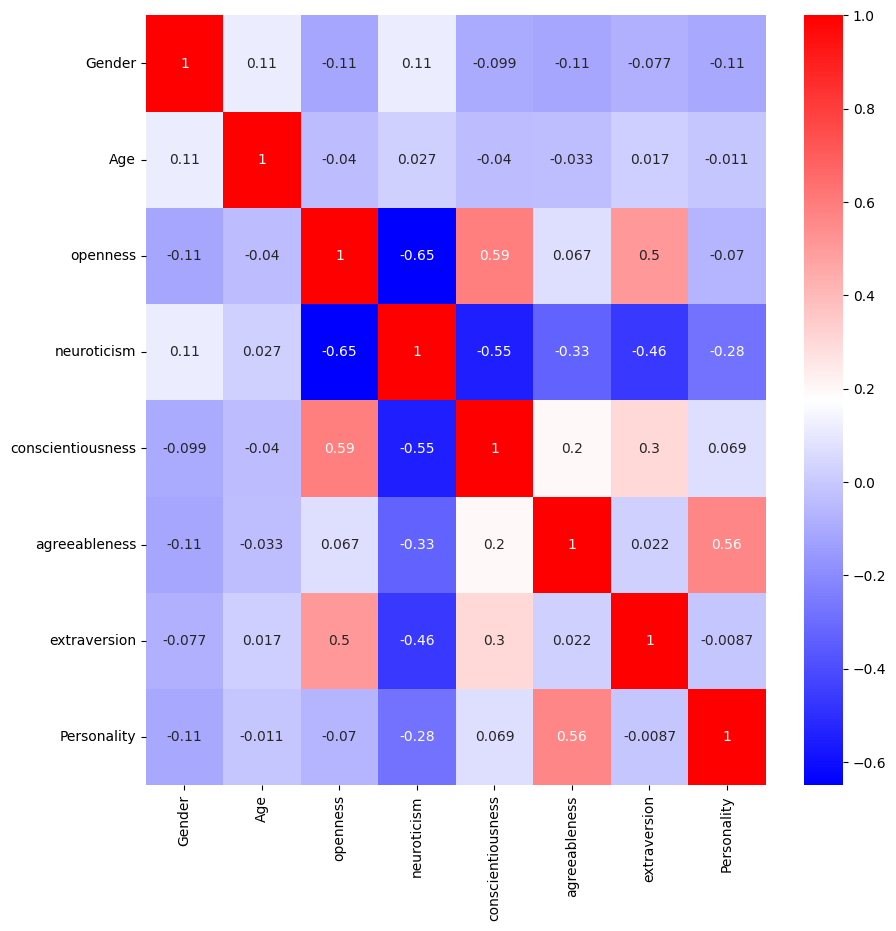

In [19]:
corrmat = df.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(10, 10))

g = sns.heatmap(df[top_corr_features].corr(),
                annot=True,
                cmap='bwr')

In [20]:
X=df.drop(['Personality'],axis=1)

y=df['Personality']

In [21]:
scaler = StandardScaler()

scaler.fit(X)

StandardScaler()

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape

(819, 7)

In [24]:
y_train.shape

(819,)

In [25]:
X_test.shape

(205, 7)

In [26]:
y_test.shape

(205,)

In [27]:
scaler.transform(X_train)

array([[ 1.04802703,  0.83880294,  1.22699529, ...,  1.54677838,
         0.94331013, -0.2073333 ],
       [ 1.04802703, -1.11865879,  0.13947956, ...,  1.03118559,
         0.38912219, -0.87707871],
       [-0.95417386, -0.72716645,  1.22699529, ...,  1.03118559,
         0.94331013,  1.80190294],
       ...,
       [ 1.04802703,  0.05581824,  1.58950054, ...,  0.        ,
        -0.71925368, -0.2073333 ],
       [ 1.04802703, -1.11865879,  0.5019848 , ...,  0.        ,
         0.38912219,  0.46241212],
       [ 1.04802703,  2.79626466,  0.13947956, ..., -1.03118559,
         2.051686  , -1.54682412]])

In [28]:
scaler.transform(X_test)

array([[ 1.04802703,  0.83880294, -0.58553093, ..., -0.51559279,
         2.051686  , -0.2073333 ],
       [-0.95417386,  0.44731059,  0.13947956, ...,  1.03118559,
        -0.16506574, -0.2073333 ],
       [-0.95417386,  2.40477232,  0.5019848 , ...,  0.        ,
        -0.16506574, -0.2073333 ],
       ...,
       [ 1.04802703, -0.3356741 , -1.67304667, ...,  0.        ,
        -1.82762955, -1.54682412],
       [ 1.04802703, -0.72716645,  0.86449005, ...,  1.03118559,
        -0.16506574, -0.2073333 ],
       [ 1.04802703, -0.3356741 , -1.67304667, ..., -1.54677838,
        -0.71925368, -0.2073333 ]])

In [29]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

In [30]:
print("The Training score of Logistic regression is: ",lr.score(X_train,y_train))

f1 = f1_score(y_test, lr_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, lr_pred))

The Training score of Logistic regression is:  0.8278388278388278
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.54        35
           1       0.95      1.00      0.97        55
           2       0.75      0.71      0.73        34
           3       0.66      0.75      0.70        51
           4       1.00      0.83      0.91        30

    accuracy                           0.78       205
   macro avg       0.78      0.76      0.77       205
weighted avg       0.78      0.78      0.78       205



In [31]:
print("The Testing score of Logistic regression is: ",lr.score(X_test,y_test))

The Testing score of Logistic regression is:  0.7804878048780488


In [32]:
svc = SVC(kernel='linear', random_state=0)  

svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

In [33]:
print("The Training score of SVC is: ",svc.score(X_train, y_train))

f1 = f1_score(y_test, svc_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, svc_pred))

The Training score of SVC is:  0.8363858363858364
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.51      0.55        35
           1       0.93      1.00      0.96        55
           2       0.80      0.71      0.75        34
           3       0.64      0.76      0.70        51
           4       0.96      0.80      0.87        30

    accuracy                           0.78       205
   macro avg       0.79      0.76      0.77       205
weighted avg       0.78      0.78      0.78       205



In [34]:
print("The Test score of SVC is: ",svc.score(X_test, y_test))

The Test score of SVC is:  0.7804878048780488


In [35]:
rf=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

In [36]:
print("The Training score of RandomForestClassifier is: ",rf.score(X_train, y_train))

f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, rf_pred))

The Training score of RandomForestClassifier is:  0.8278388278388278
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        35
           1       0.92      1.00      0.96        55
           2       0.87      0.59      0.70        34
           3       0.60      1.00      0.75        51
           4       0.96      0.77      0.85        30

    accuracy                           0.79       205
   macro avg       0.87      0.75      0.76       205
weighted avg       0.85      0.79      0.78       205



In [37]:
print("The Testing score of RandomForestClassifier is: ",rf.score(X_test, y_test))

The Testing score of RandomForestClassifier is:  0.7902439024390244


In [38]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

In [39]:
print("The Training score of GradientBoostingClassifier is: ",gb.score(X_train, y_train))

f1 = f1_score(y_test, gb_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, gb_pred))

The Training score of GradientBoostingClassifier is:  0.9511599511599511
F1 Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        35
           1       0.95      1.00      0.97        55
           2       0.90      0.76      0.83        34
           3       0.68      0.78      0.73        51
           4       0.96      0.83      0.89        30

    accuracy                           0.81       205
   macro avg       0.82      0.80      0.81       205
weighted avg       0.82      0.81      0.82       205



In [40]:
lr_cm = confusion_matrix(y_test,lr_pred)

print(lr_cm)

[[18  0  3 14  0]
 [ 0 55  0  0  0]
 [ 3  1 24  6  0]
 [11  0  2 38  0]
 [ 0  2  3  0 25]]


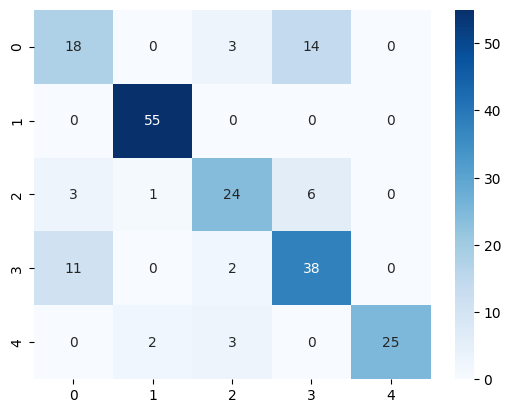

In [41]:
sns.heatmap(confusion_matrix(y_test, lr_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

In [42]:
print("accuracy for lr: ",accuracy_score(y_test,lr_pred))

accuracy for lr:  0.7804878048780488


In [43]:
svc_cm = confusion_matrix(y_test,svc_pred)

print(svc_cm)

[[18  0  1 16  0]
 [ 0 55  0  0  0]
 [ 2  1 24  6  1]
 [10  0  2 39  0]
 [ 0  3  3  0 24]]


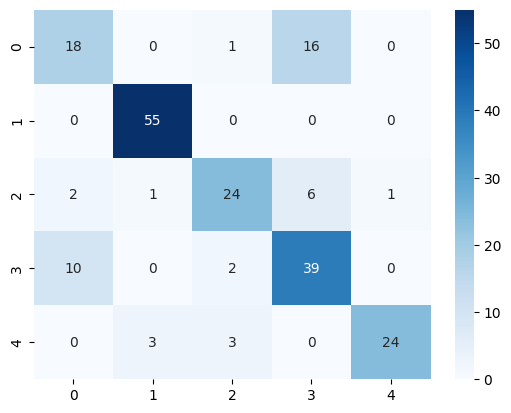

In [44]:
sns.heatmap(confusion_matrix(y_test, svc_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

In [45]:
print("accuracy for svc: ", accuracy_score(y_test,svc_pred))

accuracy for svc:  0.7804878048780488


In [46]:
rf_cm = confusion_matrix(y_test,rf_pred)

print(rf_cm)

[[13  0  0 22  0]
 [ 0 55  0  0  0]
 [ 0  1 20 12  1]
 [ 0  0  0 51  0]
 [ 0  4  3  0 23]]


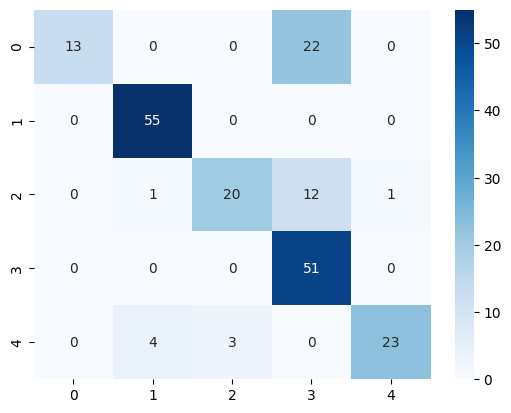

In [47]:
sns.heatmap(confusion_matrix(y_test, rf_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

In [48]:
print("accuracy for svc: ", accuracy_score(y_test,rf_pred))

accuracy for svc:  0.7902439024390244


In [49]:
gb_cm = confusion_matrix(y_test,gb_pred)

print(gb_cm)

[[21  0  0 14  0]
 [ 0 55  0  0  0]
 [ 1  1 26  5  1]
 [11  0  0 40  0]
 [ 0  2  3  0 25]]


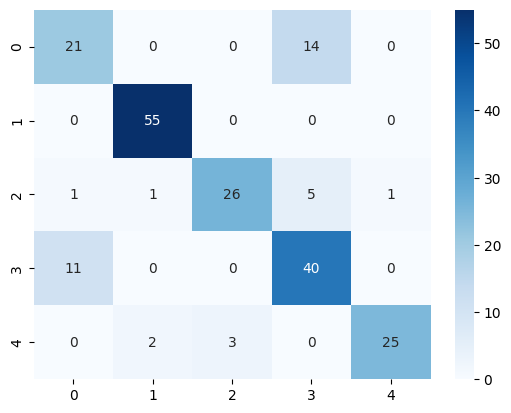

In [50]:
sns.heatmap(confusion_matrix(y_test, gb_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

In [51]:
print("accuracy for svc: ", accuracy_score(y_test,gb_pred))

accuracy for svc:  0.8146341463414634


In [52]:
filename = 'milk_model.sav'

pickle.dump(rf, open(filename, 'wb'))